-30 29 -0.9995736030415051 0.9995736030415051


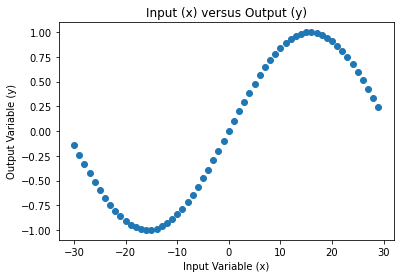

0.0 1.0 0.0 0.9999999999999999
MSE: 0.004


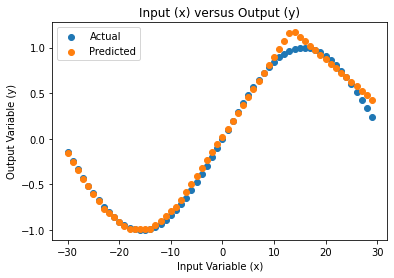

In [17]:
# example of fitting a neural net on x vs x^2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
import math

# print(math.pi)

# define the dataset
# x = asarray([i for i in range(-50,51)])
x = asarray([i for i in range(-30, 30)])

y = asarray([math.sin(i / 10.0) for i in x])
# y = asarray([i**2 for i in x])

print(x.min(), x.max(), y.min(), y.max())

# plot the input versus the output
pyplot.scatter(x,y)
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.show()

# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
# design the neural network model
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse')
# ft the model on the training dataset
model.fit(x, y, epochs=10000, batch_size=60, verbose=0)
# make predictions for the input data
yhat = model.predict(x)
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()